In [6]:
!pip3 install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 8.4 MB/s eta 0:00:18
    --------------------------------------- 3.4/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 5.5/150.0 MB 10.5 MB/s eta 0:00:14
   -- ------------------------------------- 8.1/150.0 MB 10.9 MB/s eta 0:00:13
   -- ------------------------------------- 10.2/150.0 MB 11.0 MB/s eta 0:00:13
   --- ------------------------------------ 12.8/150.0 MB 11.0 MB/s eta 0:00:13
   ---- ----------------------------------- 15.2/150.0 MB 11.3 MB/s eta 0:00:12
   ---- ----------------------------------- 17.8/150.0 MB 11.4 MB/s eta 0:00:12
   ----- ---------------------------------- 20.2/150.0 MB 11.4 MB/s eta 0:00:12
   ------ --------------------------------- 22.5/150.0 MB 11.4 MB/s eta 0:00:12
   ------ --------------------------------- 24.9/150.0 MB 11.4 MB/s eta 0:00:11
   ------- -------------------------------- 27.3/150.0

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('D:/Projects/Deep Learning 101/gtzan_features.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,label
0,blues.00024.wav,661500,0.263108,0.099980,0.086962,0.002512,1120.390980,176408.836176,1447.852625,53821.613990,...,94.161580,-2.302590,68.893074,3.783148,76.785670,0.084823,73.574780,-0.939437,126.729645,blues
1,blues.00027.wav,661500,0.288705,0.094162,0.095725,0.002194,1391.443904,200153.143237,1494.850834,43500.503910,...,61.917267,-9.396027,85.992905,-2.562838,107.918915,-4.522896,59.029346,-0.262949,67.838790,blues
2,blues.00074.wav,661500,0.367174,0.085402,0.196903,0.004284,2515.869160,272550.358669,2531.420001,66559.812170,...,85.300290,12.328122,65.853590,-13.717032,65.636055,11.850821,70.903915,-3.982272,58.626965,blues
3,blues.00075.wav,661500,0.466458,0.081497,0.192030,0.008019,2225.176866,462553.522638,2255.135044,99000.271768,...,73.999756,15.339354,75.326546,-7.049362,83.158050,12.182225,61.919407,-6.110912,92.456580,blues
4,blues.00011.wav,661500,0.365807,0.102007,0.065685,0.002501,1353.329119,511903.711272,1757.331004,220219.000176,...,148.787000,6.566734,114.196280,-4.879438,93.832950,-3.180660,84.243774,-5.557003,65.379010,blues


In [6]:
df.shape

(999, 46)

In [7]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                       object
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [8]:
print(df.iloc[:, :-1])

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00024.wav  661500          0.263108         0.099980  0.086962   
1    blues.00027.wav  661500          0.288705         0.094162  0.095725   
2    blues.00074.wav  661500          0.367174         0.085402  0.196903   
3    blues.00075.wav  661500          0.466458         0.081497  0.192030   
4    blues.00011.wav  661500          0.365807         0.102007  0.065685   
..               ...     ...               ...              ...       ...   
994    pop.00071.wav  661500          0.447408         0.092988  0.191373   
995    pop.00062.wav  661500          0.329643         0.098448  0.397851   
996    pop.00065.wav  661500          0.345651         0.097272  0.133485   
997    pop.00058.wav  661500          0.339939         0.098331  0.167422   
998    pop.00042.wav  661500          0.379730         0.090999  0.223442   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.0025

In [9]:
# Load the dataset
df = pd.read_csv('D:/Projects/Deep Learning 101/gtzan_features.csv')

# Drop the 'filename' column if it exists and is not needed
df = df.drop('filename', axis=1)

# Convert 'tempo' to numeric by removing brackets and converting to float
df['tempo'] = df['tempo'].str.strip('[]').astype(float)

# Check for missing values in 'tempo' (optional, for verification)
print("Missing values in tempo:", df['tempo'].isnull().sum())

# Encode the 'label' column (assuming it contains genres)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split into train+validation and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Further split train+val into train and validation (60% train, 20% val of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Verify no NaN values after scaling (optional, for safety)
print("NaN in X_train_scaled:", np.isnan(X_train_scaled).any())
print("NaN in X_val_scaled:", np.isnan(X_val_scaled).any())
print("NaN in X_test_scaled:", np.isnan(X_test_scaled).any())

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
X_val_tensor = torch.from_numpy(X_val_scaled).float()
y_val_tensor = torch.from_numpy(y_val.values).long()
X_test_tensor = torch.from_numpy(X_test_scaled).float()
y_test_tensor = torch.from_numpy(y_test.values).long()

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size and create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Confirm preprocessing is complete
print("Dataset loaded and preprocessed. Train size:", X_train.shape, 
      "Val size:", X_val.shape, "Test size:", X_test.shape)

Missing values in tempo: 0
NaN in X_train_scaled: False
NaN in X_val_scaled: False
NaN in X_test_scaled: False
Dataset loaded and preprocessed. Train size: (599, 44) Val size: (200, 44) Test size: (200, 44)


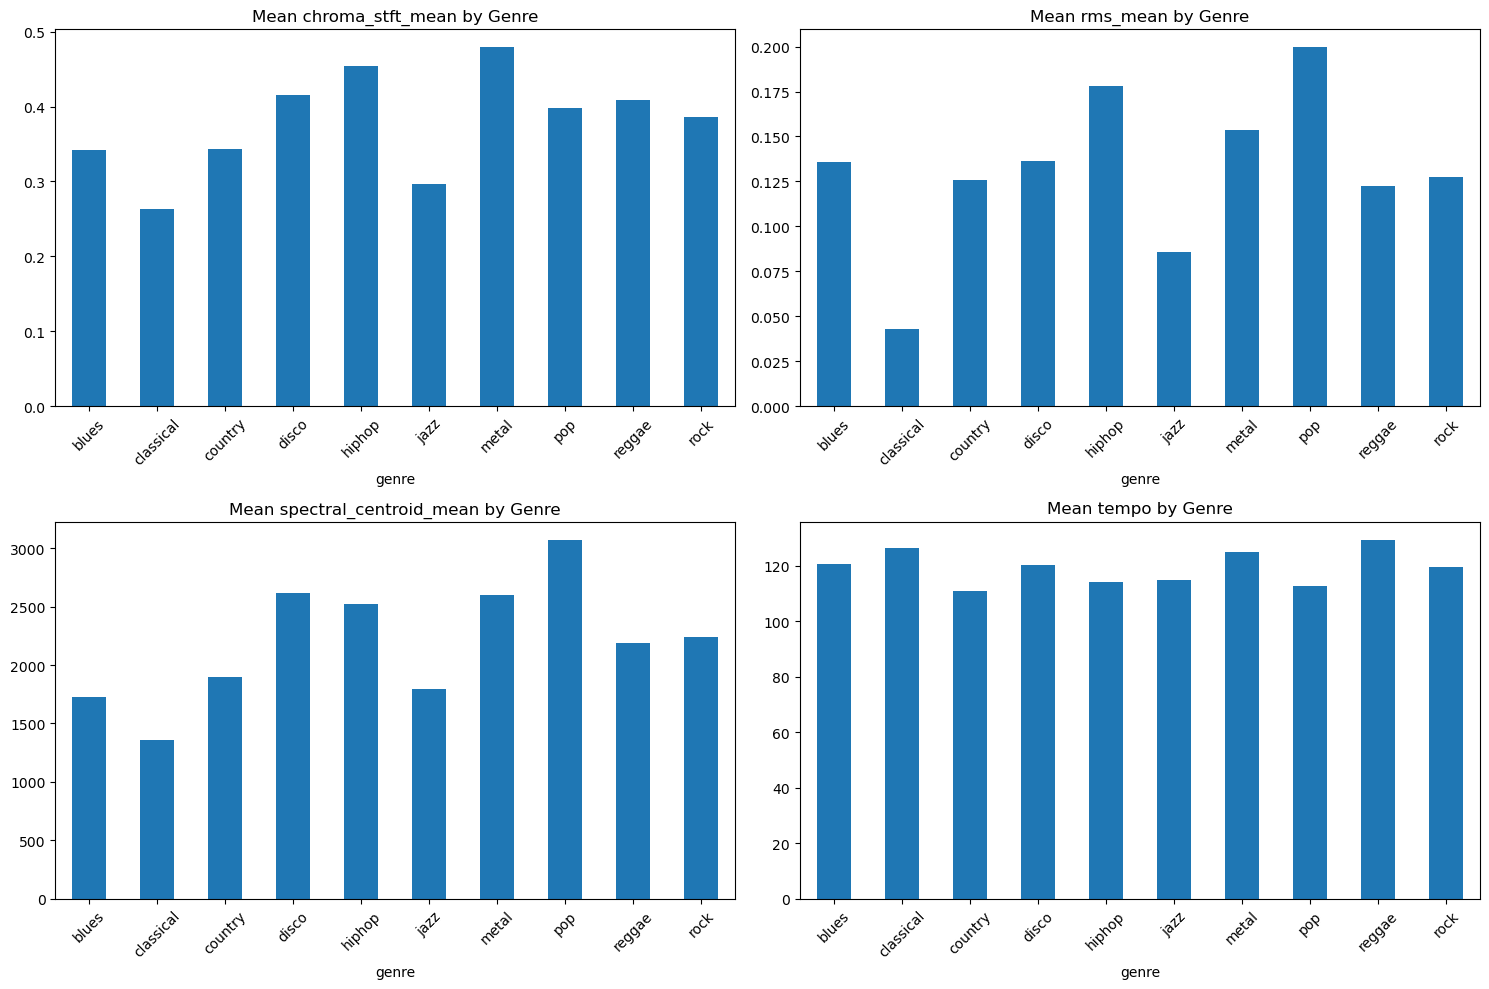

In [10]:
# Data Visualization
# Add genre names back for visualization
df['genre'] = le.inverse_transform(df['label'])

# Group by genre and compute mean for selected features
genre_means = df.groupby('genre').mean()

# Features to visualize
features_to_plot = ['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'tempo']

# Plot bar charts
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    genre_means[feature].plot(kind='bar')
    plt.title(f'Mean {feature} by Genre')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

# Drop the temporary 'genre' column
df = df.drop('genre', axis=1)

In [18]:
# Define ANN Model
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)  # Output logits (CrossEntropyLoss applies softmax)
        return out

In [25]:
# Define Hyperparameters
input_size = X_train.shape[1]  # 44 features
hidden_size1 = 128
hidden_size2 = 64
num_classes = len(le.classes_)  # 10 genres
learning_rate = 0.001
num_epochs = 50

# Initialize the model
model = ANN(input_size, hidden_size1, hidden_size2, num_classes)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Hyperparameters set. Using device: {device}")

Hyperparameters set. Using device: cuda


In [26]:
# Train Loop and Validation Loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch [1/50], Train Loss: 2.1880, Val Loss: 2.0404
Epoch [2/50], Train Loss: 1.8569, Val Loss: 1.7085
Epoch [3/50], Train Loss: 1.5402, Val Loss: 1.4691
Epoch [4/50], Train Loss: 1.3149, Val Loss: 1.3251
Epoch [5/50], Train Loss: 1.1592, Val Loss: 1.2201
Epoch [6/50], Train Loss: 1.0368, Val Loss: 1.1692
Epoch [7/50], Train Loss: 0.9431, Val Loss: 1.1147
Epoch [8/50], Train Loss: 0.8491, Val Loss: 1.0751
Epoch [9/50], Train Loss: 0.7820, Val Loss: 1.0699
Epoch [10/50], Train Loss: 0.7320, Val Loss: 1.0537
Epoch [11/50], Train Loss: 0.6661, Val Loss: 1.0252
Epoch [12/50], Train Loss: 0.6112, Val Loss: 1.0140
Epoch [13/50], Train Loss: 0.5650, Val Loss: 1.0252
Epoch [14/50], Train Loss: 0.5402, Val Loss: 1.0248
Epoch [15/50], Train Loss: 0.5045, Val Loss: 1.0119
Epoch [16/50], Train Loss: 0.4753, Val Loss: 1.0441
Epoch [17/50], Train Loss: 0.4417, Val Loss: 1.0250
Epoch [18/50], Train Loss: 0.4095, Val Loss: 1.0237
Epoch [19/50], Train Loss: 0.3866, Val Loss: 1.0467
Epoch [20/50], Train 

In [31]:
# Define the ANN model class (with addition dropout for regularization)
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, dropout_rate, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)  # Add dropout after first hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)  # Add dropout after second hidden layer
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

# Define a function to create the skorch model
def create_skorch_model(input_size, hidden_size1, hidden_size2, dropout_rate, num_classes, lr):
    return NeuralNetClassifier(
        module=ANN,
        module__input_size=input_size,
        module__hidden_size1=hidden_size1,
        module__hidden_size2=hidden_size2,
        module__dropout_rate=dropout_rate,
        module__num_classes=num_classes,
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.Adam,
        optimizer__lr=lr,
        max_epochs=20,  # Reduced epochs for tuning speed; adjust as needed
        batch_size=32,
        device=device,  # Use cuda if available
        verbose=0  # Suppress training output for cleaner logs
    )

# Set fixed parameters
input_size = X_train.shape[1]  # Number of features (44 in your case)
num_classes = len(le.classes_)  # Number of genres (10)

# Define the hyperparameter grid
param_grid = {
    'module__hidden_size1': [64, 128, 256],          # First hidden layer sizes
    'module__hidden_size2': [32, 64, 128],           # Second hidden layer sizes
    'module__dropout_rate': [0.0, 0.2, 0.5],        # Dropout rates for regularization
    'optimizer__lr': [0.0001, 0.001, 0.01]          # Learning rates
}

# Create the skorch model with placeholder values (will be overridden by grid search)
base_model = create_skorch_model(
    input_size=input_size,
    hidden_size1=128,  # Placeholder
    hidden_size2=64,   # Placeholder
    dropout_rate=0.0,  # Placeholder
    num_classes=num_classes,
    lr=0.001           # Placeholder
)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    base_model,
    param_grid,
    scoring='neg_log_loss',  # Optimize for log loss (equivalent to cross-entropy)
    cv=3,                    # 3-fold cross-validation
    n_jobs=-1,               # Use all available CPU cores
    verbose=1
)

# Convert tensors to numpy arrays for skorch compatibility
X_train_np = X_train_tensor.numpy()
y_train_np = y_train_tensor.numpy()

# Fit the grid search (this will take some time)
grid_search.fit(X_train_np, y_train_np)

# Print results
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score (neg_log_loss):", grid_search.best_score_)

# Extract the best parameters
best_hidden_size1 = grid_search.best_params_['module__hidden_size1']
best_hidden_size2 = grid_search.best_params_['module__hidden_size2']
best_dropout_rate = grid_search.best_params_['module__dropout_rate']
best_lr = grid_search.best_params_['optimizer__lr']

# Update the original model with the best parameters
model = ANN(
    input_size=input_size,
    hidden_size1=best_hidden_size1,
    hidden_size2=best_hidden_size2,
    dropout_rate=best_dropout_rate,
    num_classes=num_classes
).to(device)

# Update the optimizer with the best learning rate
optimizer = optim.Adam(model.parameters(), lr=best_lr)

print(f"Updated model with best parameters: hidden_size1={best_hidden_size1}, "
      f"hidden_size2={best_hidden_size2}, dropout_rate={best_dropout_rate}, lr={best_lr}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found: {'module__dropout_rate': 0.2, 'module__hidden_size1': 256, 'module__hidden_size2': 128, 'optimizer__lr': 0.001}
Best cross-validation score (neg_log_loss): -0.9761108895115912
Updated model with best parameters: hidden_size1=256, hidden_size2=128, dropout_rate=0.2, lr=0.001


In [32]:
# Train Loop and Validation Loop with Best Parameters
train_losses = []
val_losses = []

# Ensure num_epochs is defined (e.g., from your original setup)
num_epochs = 50

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch [1/50], Train Loss: 2.1146, Val Loss: 1.8474
Epoch [2/50], Train Loss: 1.6084, Val Loss: 1.4614
Epoch [3/50], Train Loss: 1.2937, Val Loss: 1.2544
Epoch [4/50], Train Loss: 1.1058, Val Loss: 1.1676
Epoch [5/50], Train Loss: 0.9727, Val Loss: 1.1054
Epoch [6/50], Train Loss: 0.8666, Val Loss: 1.1107
Epoch [7/50], Train Loss: 0.8113, Val Loss: 1.0530
Epoch [8/50], Train Loss: 0.7140, Val Loss: 1.0332
Epoch [9/50], Train Loss: 0.6245, Val Loss: 1.0380
Epoch [10/50], Train Loss: 0.5937, Val Loss: 1.0393
Epoch [11/50], Train Loss: 0.5809, Val Loss: 1.0968
Epoch [12/50], Train Loss: 0.5341, Val Loss: 1.0454
Epoch [13/50], Train Loss: 0.5107, Val Loss: 1.0226
Epoch [14/50], Train Loss: 0.4802, Val Loss: 1.0824
Epoch [15/50], Train Loss: 0.4280, Val Loss: 1.0645
Epoch [16/50], Train Loss: 0.4099, Val Loss: 1.0618
Epoch [17/50], Train Loss: 0.3781, Val Loss: 1.0530
Epoch [18/50], Train Loss: 0.3608, Val Loss: 1.1024
Epoch [19/50], Train Loss: 0.3582, Val Loss: 1.0738
Epoch [20/50], Train 

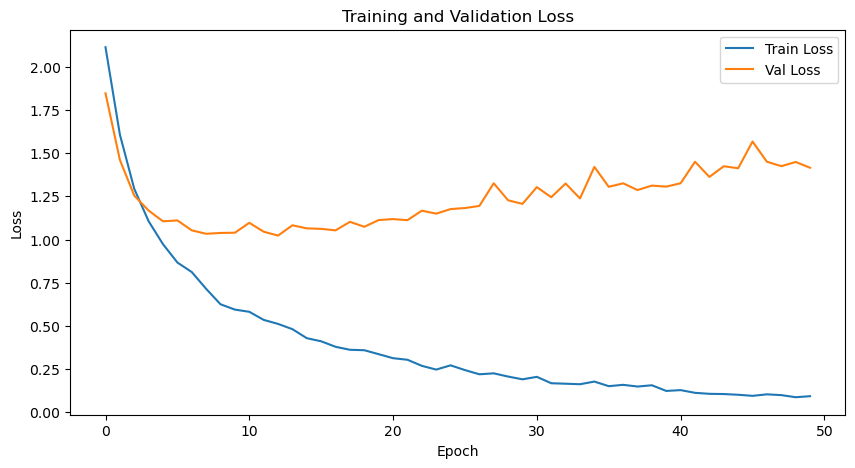

In [33]:
# Train-Validation Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [34]:
# Save the Model
torch.save(model.state_dict(), 'ann_model.pth')
print("ANN model saved as 'ann_model.pth'")

ANN model saved as 'ann_model.pth'


ANN Accuracy: 0.7250
ANN Classification Report:
               precision    recall  f1-score   support

       blues       0.76      0.80      0.78        20
   classical       0.83      1.00      0.91        20
     country       0.84      0.80      0.82        20
       disco       0.69      0.55      0.61        20
      hiphop       0.64      0.70      0.67        20
        jazz       0.82      0.70      0.76        20
       metal       0.70      0.80      0.74        20
         pop       0.85      0.85      0.85        20
      reggae       0.55      0.55      0.55        20
        rock       0.56      0.50      0.53        20

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



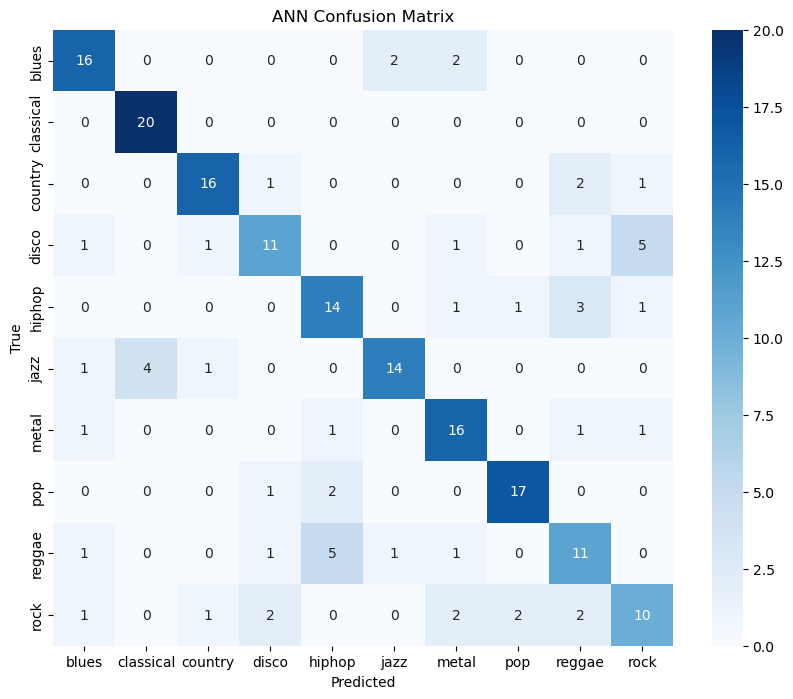

In [35]:
# Testing the ANN Model
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute and print metrics
ann_accuracy = accuracy_score(all_labels, all_preds)
print(f"ANN Accuracy: {ann_accuracy:.4f}")
print("ANN Classification Report:\n", classification_report(all_labels, all_preds, target_names=le.classes_))

# Confusion matrix visualization
conf_mat = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN Confusion Matrix')
plt.show()

XGBoost Accuracy: 0.6800
XGBoost Classification Report:
               precision    recall  f1-score   support

       blues       0.86      0.60      0.71        20
   classical       0.83      1.00      0.91        20
     country       0.57      0.65      0.60        20
       disco       0.59      0.50      0.54        20
      hiphop       0.63      0.60      0.62        20
        jazz       0.88      0.75      0.81        20
       metal       0.83      0.95      0.88        20
         pop       0.80      0.80      0.80        20
      reggae       0.46      0.55      0.50        20
        rock       0.42      0.40      0.41        20

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.68      0.68       200



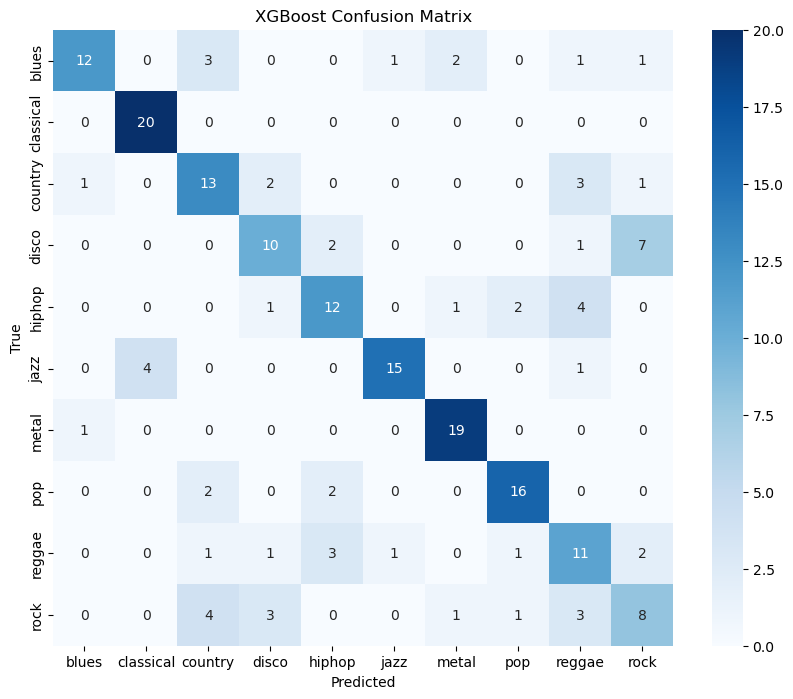

In [36]:
# Implement XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    random_state=42
)

# Train XGBoost using the scaled numpy arrays
xgb_model.fit(X_train_scaled, y_train.values)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Compute and print metrics
xgb_accuracy = accuracy_score(y_test.values, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("XGBoost Classification Report:\n", classification_report(y_test.values, y_pred_xgb, target_names=le.classes_))

# Confusion matrix visualization
conf_mat_xgb = confusion_matrix(y_test.values, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [37]:
# Model Comparison
print(f"ANN Accuracy: {ann_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

if ann_accuracy > xgb_accuracy:
    print("ANN performs better based on accuracy.")
else:
    print("XGBoost performs better based on accuracy.")

ANN Accuracy: 0.7250
XGBoost Accuracy: 0.6800
ANN performs better based on accuracy.
